## 그래프 : 기본

* 선 그래프 (Line Plot)
* 산점도 (Scatter Plot)
* 막대 그래프 (Bar Plot)
* 히스토그램 (Histogram)
* 줄기-잎 그림 (Stem Plot)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mat
import seaborn as sns

In [2]:
# 애플용 설정
import platform

if platform.system() == 'Darwin':
    mat.rc('font', family='AppleGothic')

In [3]:
# import Rdata
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

rdata_file_path = '../../Dataset/bacteria.Rdata'
robjects.r['load'](rdata_file_path)

array(['bacteria.table'], dtype='<U14')

In [4]:
data = pandas2ri.rpy2py(robjects.r['bacteria.table'])
data.head()

,t,N_t
1,1,355
2,2,211
3,3,197
4,4,166
5,5,142


## 선그림 그리기

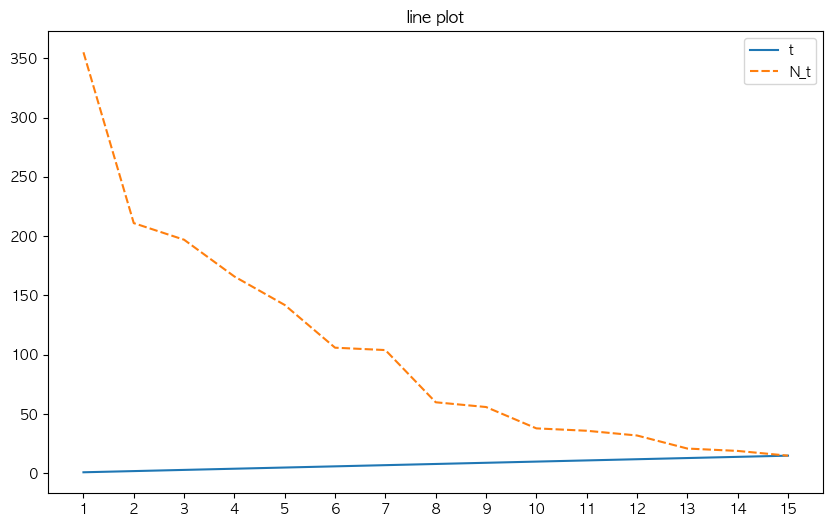

In [6]:
# 선그림
plt.figure(figsize=(10, 6))
sns.lineplot(data=data)
plt.title('line plot')
plt.show()

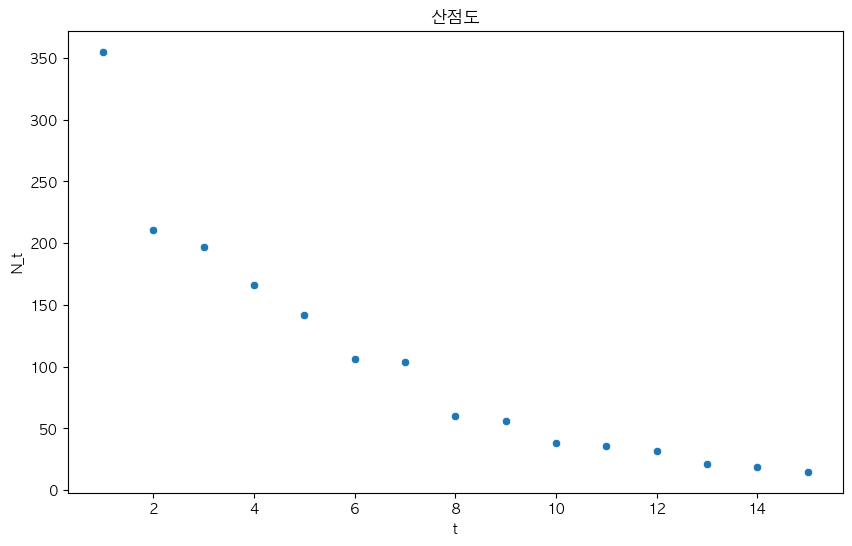

In [7]:
# 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=data.columns[0], y=data.columns[1])
plt.title('산점도')
plt.show()

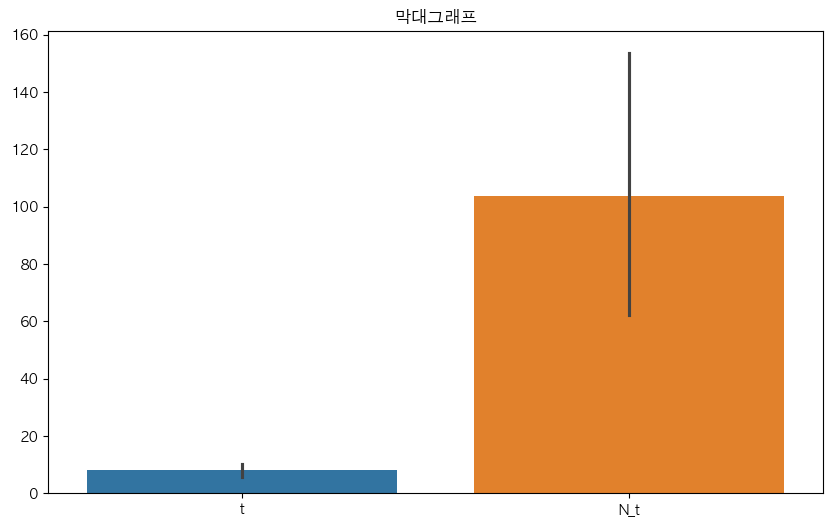

In [9]:
# 막대그래프
plt.figure(figsize=(10, 6))
sns.barplot(data=data)
plt.title('막대그래프')
plt.show()

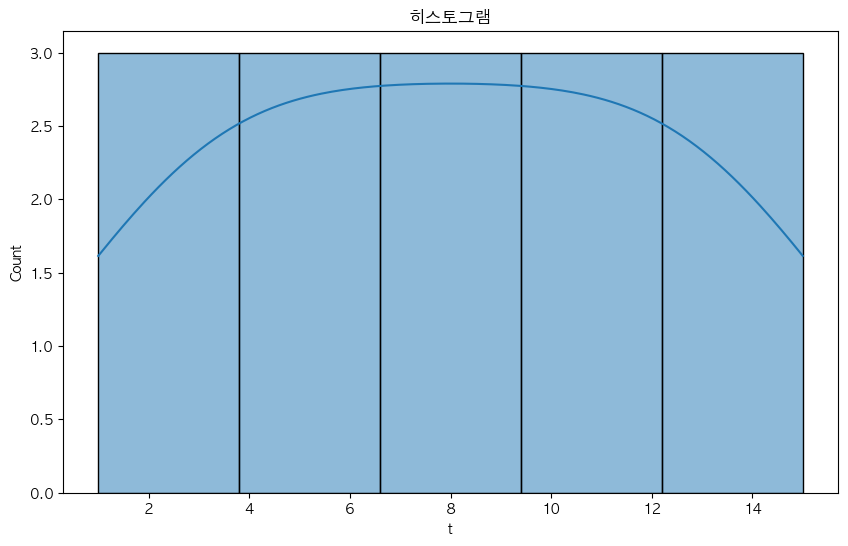

In [10]:
# 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(data=data[data.columns[0]], kde=True)
plt.title('히스토그램')
plt.show()

In [11]:
# 줄기 잎 그림
def stem_plot(data):
    data_sorted = np.sort(data)
    stems = data_sorted // 10
    leaves = data_sorted % 10

    stems_unique = np.unique(stems)
    for stem in stems_unique:
        print(f"{int(stem)} |", " ".join(str(int(leaf)) for leaf in leaves[stems == stem]))

print("줄기 잎 그림")
stem_plot(data[data.columns[0]].values)

줄기 잎 그림
0 | 1 2 3 4 5 6 7 8 9
1 | 0 1 2 3 4 5
